In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [27]:
df = pd.read_csv('iith_foml_2023_train.csv')
test_data = pd.read_csv('test_input.csv')

In [28]:
def func(df):
    columns_to_remove = ['Feature 14', 'Feature 16']
    df = df.drop(columns=columns_to_remove)
    return df

df = func(df)
df

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 15,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24,Target Variable (Discrete)
0,1404,12,64,14,3,1,1,1,110.502,35775.2,...,5000.5,NaN,15.04,104,12,2,32,1409,37677.1,1
1,909,0,235,32,1,1,1,1,-40.448,35779.4,...,3720.5,4900.005,12.03,20,1,0,13,909,25239.1,1
2,654,3,175,2,1,1,1,1,-27.445,35770.4,...,4685.4,10000.004,13.01,1,1,0,13,654,27683.5,1
3,1372,12,382,14,2,0,1,0,0.001,509.2,...,NaN,NaN,NaN,313,12,10,54,1377,39363.2,0
4,786,3,199,2,1,0,1,0,0.001,612.1,...,4.1,NaN,NaN,171,1,5,11,786,40044.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1388,0,382,14,2,0,1,0,0.002,628.5,...,2700.4,NaN,NaN,104,12,11,53,1393,41473.4,0
990,1339,0,344,14,3,0,1,0,0.002,520.3,...,1.3,NaN,NaN,205,12,10,63,1344,40916.2,2
991,527,7,40,5,5,2,1,3,0.005,19130.1,...,1415.5,1000.002,7.02,101,6,7,95,527,37938.4,6
992,1144,12,120,14,3,0,1,0,0.003,785.2,...,300.1,NaN,NaN,166,12,11,53,1149,33433.5,0


In [29]:
df

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 15,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24,Target Variable (Discrete)
0,1404,12,64,14,3,1,1,1,110.502,35775.2,...,5000.5,NaN,15.04,104,12,2,32,1409,37677.1,1
1,909,0,235,32,1,1,1,1,-40.448,35779.4,...,3720.5,4900.005,12.03,20,1,0,13,909,25239.1,1
2,654,3,175,2,1,1,1,1,-27.445,35770.4,...,4685.4,10000.004,13.01,1,1,0,13,654,27683.5,1
3,1372,12,382,14,2,0,1,0,0.001,509.2,...,NaN,NaN,NaN,313,12,10,54,1377,39363.2,0
4,786,3,199,2,1,0,1,0,0.001,612.1,...,4.1,NaN,NaN,171,1,5,11,786,40044.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1388,0,382,14,2,0,1,0,0.002,628.5,...,2700.4,NaN,NaN,104,12,11,53,1393,41473.4,0
990,1339,0,344,14,3,0,1,0,0.002,520.3,...,1.3,NaN,NaN,205,12,10,63,1344,40916.2,2
991,527,7,40,5,5,2,1,3,0.005,19130.1,...,1415.5,1000.002,7.02,101,6,7,95,527,37938.4,6
992,1144,12,120,14,3,0,1,0,0.003,785.2,...,300.1,NaN,NaN,166,12,11,53,1149,33433.5,0


In [30]:
# Loading our dataset from a CSV file



X = df.drop(columns=['Target Variable (Discrete)'])
X.fillna(X.mean(), inplace=True)
y = df['Target Variable (Discrete)']

# tried finding NaNs
# print(np.unique(y))
# expected_classes = np.arange(np.max(y) + 1)
# missing_classes = np.setdiff1d(expected_classes, np.unique(y))
# print("Missing classes:", missing_classes)


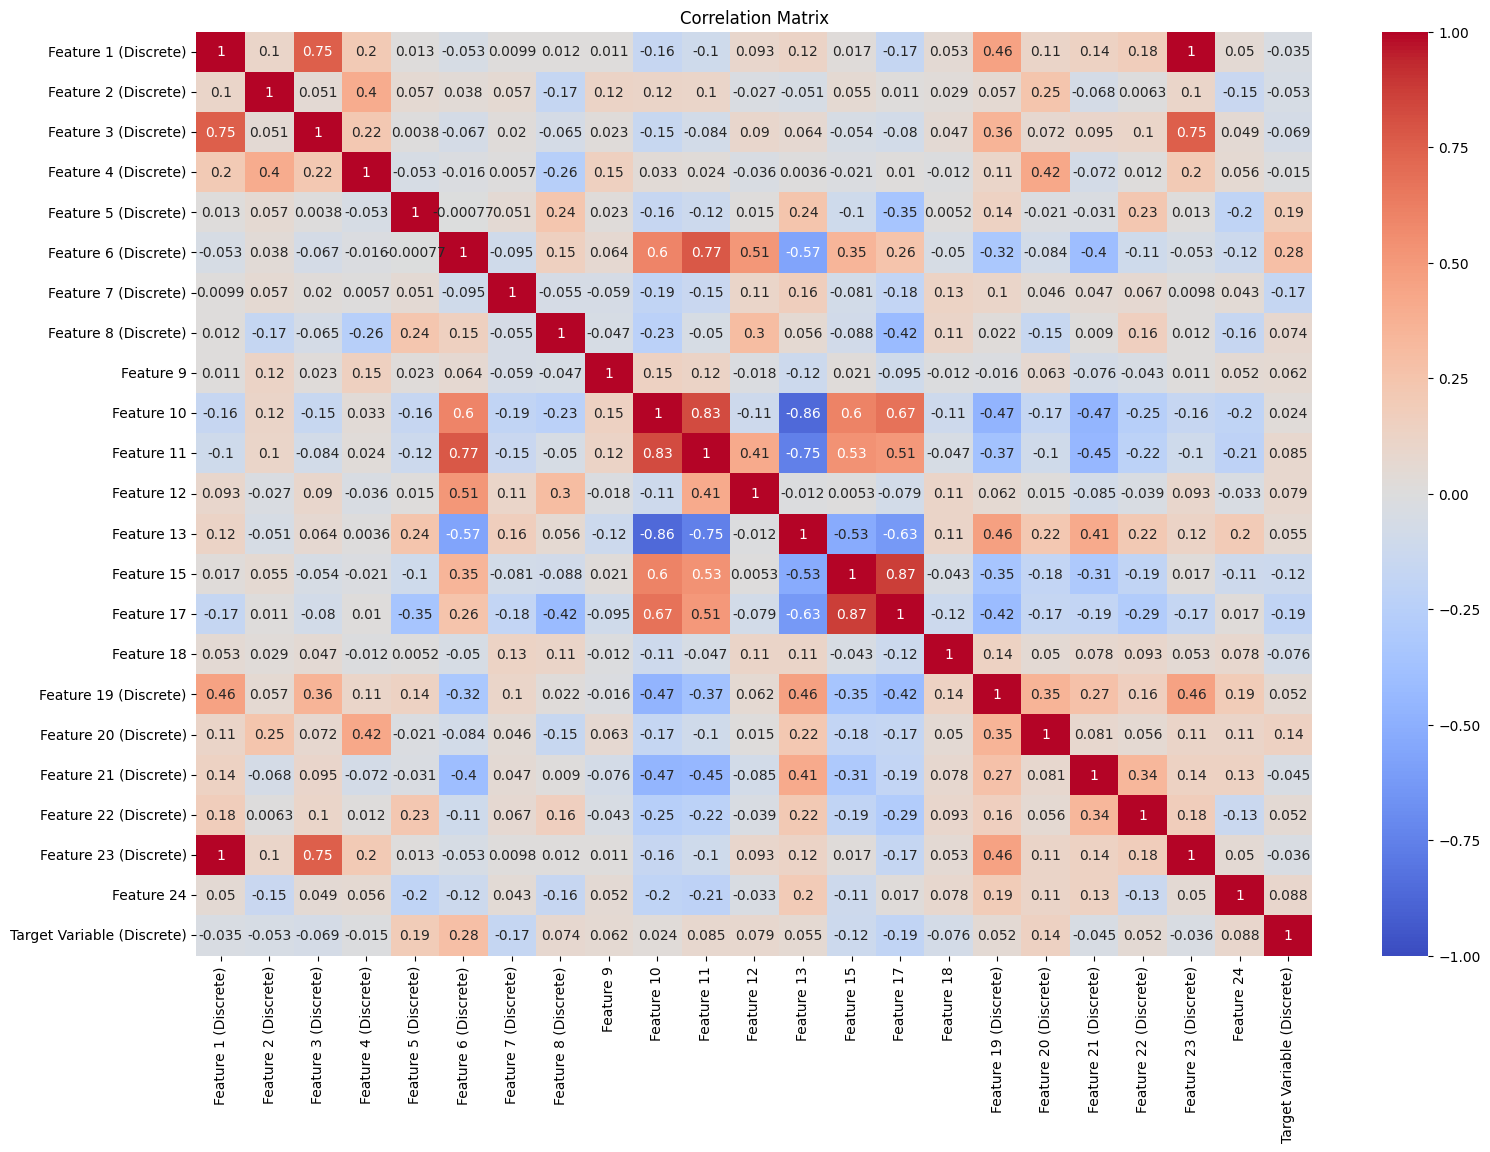

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
df

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 15,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24,Target Variable (Discrete)
0,1404,12,64,14,3,1,1,1,110.502,35775.2,...,5000.5,NaN,15.04,104,12,2,32,1409,37677.1,1
1,909,0,235,32,1,1,1,1,-40.448,35779.4,...,3720.5,4900.005,12.03,20,1,0,13,909,25239.1,1
2,654,3,175,2,1,1,1,1,-27.445,35770.4,...,4685.4,10000.004,13.01,1,1,0,13,654,27683.5,1
3,1372,12,382,14,2,0,1,0,0.001,509.2,...,NaN,NaN,NaN,313,12,10,54,1377,39363.2,0
4,786,3,199,2,1,0,1,0,0.001,612.1,...,4.1,NaN,NaN,171,1,5,11,786,40044.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1388,0,382,14,2,0,1,0,0.002,628.5,...,2700.4,NaN,NaN,104,12,11,53,1393,41473.4,0
990,1339,0,344,14,3,0,1,0,0.002,520.3,...,1.3,NaN,NaN,205,12,10,63,1344,40916.2,2
991,527,7,40,5,5,2,1,3,0.005,19130.1,...,1415.5,1000.002,7.02,101,6,7,95,527,37938.4,6
992,1144,12,120,14,3,0,1,0,0.003,785.2,...,300.1,NaN,NaN,166,12,11,53,1149,33433.5,0


In [34]:
#Gradient Boost classifier
gboost_classifier = GradientBoostingClassifier(n_estimators=500, random_state=42)


# logestic reg for comparing
logestic_reg_classifier = LogisticRegression()


pipeline_gboost = make_pipeline(StandardScaler(), gboost_classifier)

pipeline_logreg = make_pipeline(StandardScaler(), logestic_reg_classifier)
# Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluation of different possible Models
accuracy_gb = cross_val_score(pipeline_gboost, X_train, y_train, cv=cv, scoring='accuracy')

accuracy_logreg = cross_val_score(pipeline_logreg, X_train, y_train, cv=cv, scoring='accuracy')

# Print the cross-validation results, will use the best one among them according to the data_set
print(f"Gradient Boosting Accuracy: {np.mean(accuracy_gb)}")

print(f"Logistic Regression Accuracy: {np.mean(accuracy_logreg)}")

# Choose the best model and fit it to the entire training set
best_model = pipeline_gboost  
# Choosing gradinet boosting as we know that it is better than simple logestic regression
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred, average='weighted')  # For multiclass, specify the average parameter

print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1_score}")

e:\Kali\Python\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
e:\Kali\Python\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
e:\Kali\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\Kali\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1

Gradient Boosting Accuracy: 0.8917879746835442
Logistic Regression Accuracy: 0.8239240506329114
Test Accuracy: 0.8442211055276382
Test F1 Score: 0.8284715255296317


In [35]:
test_data = func(test_data)
X_eval = test_data.iloc[:, :]
X_eval.fillna(X_eval.mean(), inplace=True)

X_eval = scaler.transform(X_eval)
y_eval = best_model.predict(X_eval)
sno = []
for i in range(len(y_eval)):
    sno.append(i+1)
t_df = pd.DataFrame({'Id': sno, 'Category': y_eval})
filename = 'test_output.csv'
t_df.to_csv(filename, index=False)